# 3 Final Project Submission
* name: Leticia D Drasler (Fernandes)
* pace: Part time
* Scheduled project review data/time: November 16th, 2021, 08:00 AM (Mountain Time)
* Course Instructor: Abhineet
* Blog post URL:https://callableleticia.blog/2021/11/14/3rd-project-machine-learning/
* GitHub repository:https://github.com/lddrasler/Tanzania_Water_Pumps

## Importing packages and undarstanding Data

In [65]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [66]:
df_values = pd.read_csv('training_set_values.csv', index_col='id')
df_labels = pd.read_csv('training_set_labels.csv', index_col='id')

df_values.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [67]:
df_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [68]:
list(df_values.columns.values)

['amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [69]:
df_labels.head(5)

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [70]:
df_labels.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Plotting variables to have a better undarstading and visualization

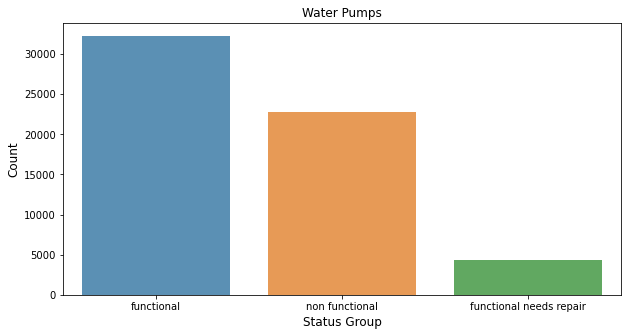

In [71]:
func_pump = df_labels['status_group'].value_counts()
func_pump = func_pump[:100,]
plt.figure(figsize=(10,5))
sns.barplot(func_pump.index, func_pump.values, alpha=0.8)
plt.title('Water Pumps')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Status Group', fontsize=12)
plt.show()

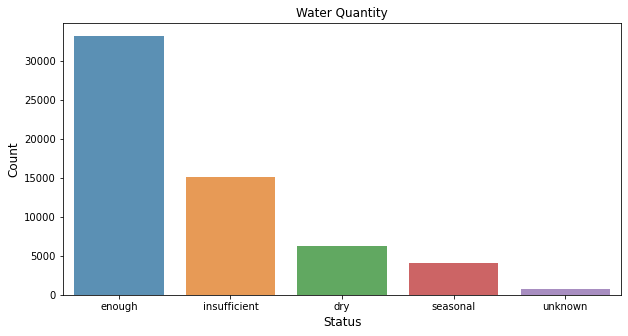

In [72]:
quantity = df_values['quantity'].value_counts()
quantity = quantity[:100,]
plt.figure(figsize=(10,5))
sns.barplot(quantity.index, quantity.values, alpha=0.8)
plt.title('Water Quantity')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Status', fontsize=12)
plt.show()

## Joing the two dataset, values and labels.

In [73]:
df_training = pd.concat([df_labels, df_values], axis=1, join='inner')
df_training.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


# Filling NaN and Dropping Columns

In [74]:
to_drop =['num_private','date_recorded','longitude','latitude','subvillage',
          'region_code','district_code','lga','ward','recorded_by',
          'scheme_management','scheme_name', 'extraction_type_group',
          'extraction_type_class','management_group','payment',
          'quality_group','quantity_group','source_type',
          'source_class','waterpoint_type_group','wpt_name']
df_training.drop(to_drop,axis=1, inplace=True)

In [75]:
df_training.public_meeting.fillna(False,inplace=True)

In [76]:
df_training.permit.fillna(False,inplace=True)

# Transforming and Binning values
* Funder
* Installer
* Construction Year
* Extraction
* Management
* Population

In [77]:
funder_bins=list(df_training.funder.value_counts().index[:8])
funder_bins

['Government Of Tanzania',
 'Danida',
 'Hesawa',
 'Rwssp',
 'World Bank',
 'Kkkt',
 'World Vision',
 'Unicef']

In [78]:
funder_dict=dict(zip(funder_bins,range(1,len(funder_bins)+1)))
funder_dict

{'Government Of Tanzania': 1,
 'Danida': 2,
 'Hesawa': 3,
 'Rwssp': 4,
 'World Bank': 5,
 'Kkkt': 6,
 'World Vision': 7,
 'Unicef': 8}

In [79]:
df_training['funder']=df_training['funder'].apply(
    lambda x: funder_dict[x] if x in funder_bins else 0)

In [80]:
installers=list(df_training.installer.value_counts()[:10].index)
installers.remove('0')
installers_dict = dict(zip(installers,range(1,len(installers)+1)))
df_training['installer']=df_training['installer'].apply(
    lambda x: installers_dict[x] if x in installers else 0)

In [81]:
management=list(df_training.management.value_counts()[:4].index)
management_dict = dict(zip(management,range(1,len(management)+1)))
df_training['management']=df_training['management'].apply(
    lambda x: management_dict[x] if x in management else 0)

In [82]:
max_year=df_training['construction_year'].describe()['max']
max_year = float(max_year)
min_year=df_training['construction_year'][df_training[
    'construction_year']!=0].sort_values(ascending=True).iloc[0]
min_year = float(min_year)
year_bins=np.linspace(min_year,max_year,7)
year_bins=[np.round(x) for x in year_bins ]
year_bins=[0,1]+year_bins[1:]
year_bins

[0, 1, 1969.0, 1978.0, 1986.0, 1995.0, 2004.0, 2013.0]

In [83]:
df_training['construction_year']=pd.cut(df_training['construction_year'],[
    0,1,1960,1969,1978,1987,1995,2004,2013
],include_lowest=True,labels=[1,2,3,4,5,6,7,8])

In [84]:
extractions=list(df_training.extraction_type.value_counts()[0:4].index)
extractions.remove('other')
extractions_dict = dict(zip(extractions,range(1,len(extractions)+1)))
extractions_dict

{'gravity': 1, 'nira/tanira': 2, 'submersible': 3}

In [85]:
df_training['extraction_type']=df_training['extraction_type'].apply(
    lambda x: extractions_dict[x] if x in extractions else 0
)

In [86]:
df_training.population=df_training.population.apply(
    lambda x: 1 if x>1 else 0
)

In [87]:
df_training.management.value_counts()

1    40507
0     6910
2     6515
3     2933
4     2535
Name: management, dtype: int64

## Creating Target Y and Predictor X

In [88]:
categoricals=['funder','installer','management','public_meeting',
              'construction_year','extraction_type','permit','basin',
              'region','population','water_quality','quantity','source',
              'waterpoint_type','payment_type'
             ]

In [89]:
status_map={'non functional':0,'functional':1,'functional needs repair':2}
y=df_training['status_group'].replace(status_map)
X=df_training.drop('status_group',axis=1)

In [90]:
X=pd.get_dummies(X,columns=categoricals,drop_first=True)

In [106]:
X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size = 0.25, random_state=30)

## Modeling 

##### DecisionTree

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [109]:
clf.decision_path(X_test)

<14850x31 sparse matrix of type '<class 'numpy.int64'>'
	with 74250 stored elements in Compressed Sparse Row format>

In [110]:
clf.feature_importances_

array([0.03789743, 0.00825154, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01730676, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01692522, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00741096, 0.        ,
       0.        , 0.00537818, 0.        , 0.        , 0.        ,
       0.        , 0.17568607, 0.13305571, 0.20290501, 0.     

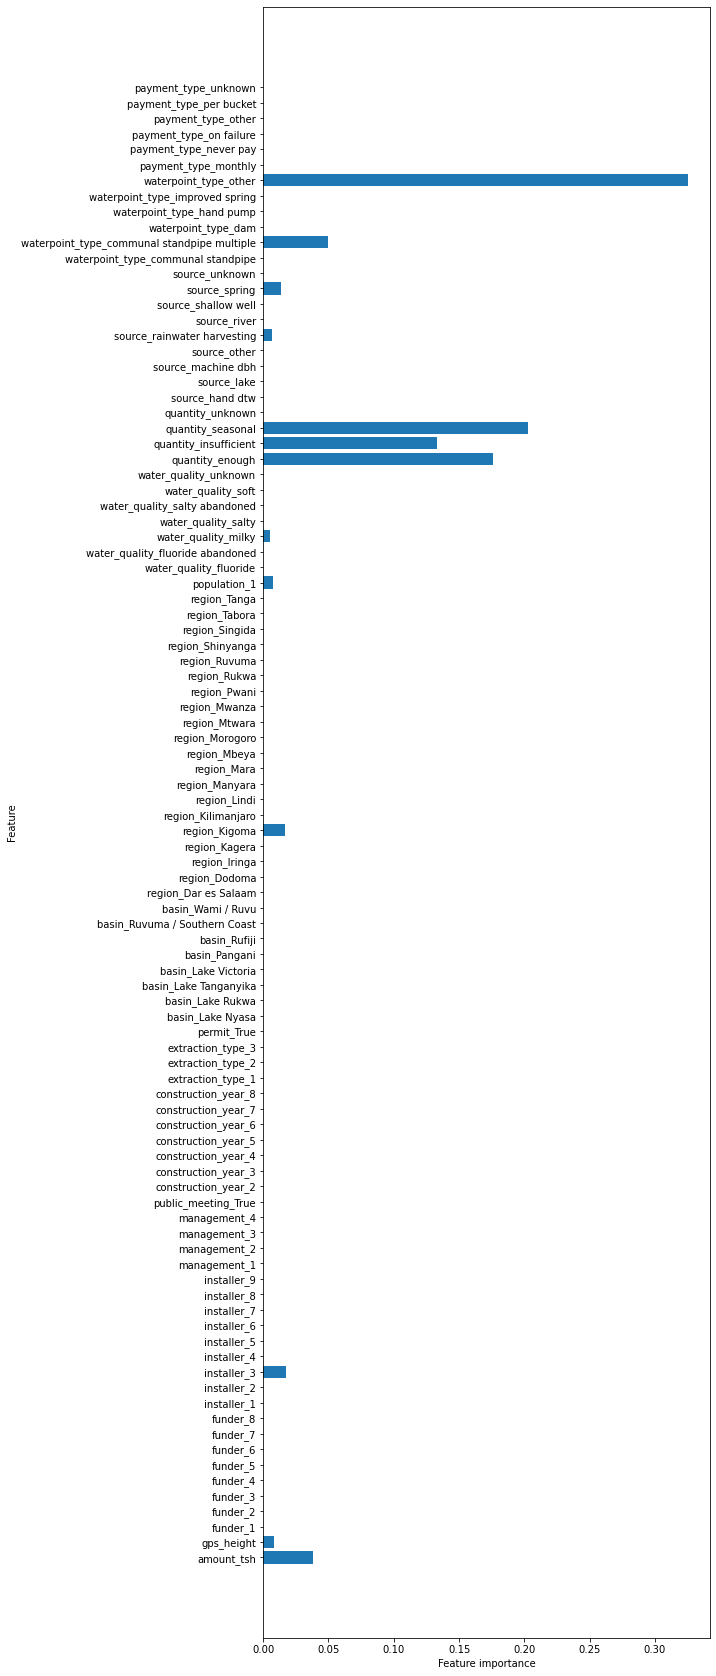

In [111]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,30))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

In [112]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=900)
tree.plot_tree(clf,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [113]:
y_preds=clf.predict(X_test)

In [114]:
accuracy_score(y_test,y_preds)

0.7072053872053872

In [115]:
confusion_matrix(y_test,y_preds)

array([[2586, 3008,   44],
       [ 284, 7848,   39],
       [  93,  880,   68]], dtype=int64)

In [116]:
# DecisionTree does not has a good perfomance 
# Confusion Matrix also does not look good

##### ROC CURVE

In [117]:
from sklearn.metrics import roc_curve, auc

# Identify the optimal tree depth for given data

max_depth = range(1,32)
roc_train = []
roc_test = []
accuracy_scores_train=[]
accuracy_scores_test=[]
for test_parm in max_depth:
    dt = DecisionTreeClassifier(random_state=10,max_depth=test_parm)
    dt.fit(X_train, y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    accuracy_scores_train.append((test_parm,accuracy_score(y_pred_train,y_train)))
    accuracy_scores_test.append((test_parm,accuracy_score(y_pred_test,y_test)))


In [118]:
accuracy_scores_train

[(1, 0.6162289562289562),
 (2, 0.6197530864197531),
 (3, 0.6756902356902357),
 (4, 0.7046464646464646),
 (5, 0.7163187429854097),
 (6, 0.7243995510662178),
 (7, 0.7335353535353535),
 (8, 0.742020202020202),
 (9, 0.7523681257014591),
 (10, 0.7645791245791246),
 (11, 0.7752637485970819),
 (12, 0.7865993265993266),
 (13, 0.7980246913580247),
 (14, 0.8095622895622896),
 (15, 0.8222446689113356),
 (16, 0.8349719416386083),
 (17, 0.8465544332210999),
 (18, 0.8573961840628507),
 (19, 0.8675196408529742),
 (20, 0.8764534231200898),
 (21, 0.8847362514029181),
 (22, 0.8923456790123456),
 (23, 0.8987205387205387),
 (24, 0.9039955106621773),
 (25, 0.9092031425364758),
 (26, 0.914006734006734),
 (27, 0.9181593714927049),
 (28, 0.9215488215488216),
 (29, 0.9248709315375983),
 (30, 0.927384960718294),
 (31, 0.93003367003367)]

In [119]:
accuracy_scores_test

[(1, 0.6204040404040404),
 (2, 0.617979797979798),
 (3, 0.6791245791245791),
 (4, 0.7072053872053872),
 (5, 0.7177777777777777),
 (6, 0.7241750841750841),
 (7, 0.7316498316498317),
 (8, 0.7378451178451179),
 (9, 0.7430976430976431),
 (10, 0.7476767676767677),
 (11, 0.7521212121212121),
 (12, 0.7597979797979798),
 (13, 0.7602693602693603),
 (14, 0.7626936026936026),
 (15, 0.7646464646464647),
 (16, 0.7672727272727272),
 (17, 0.7659259259259259),
 (18, 0.7659259259259259),
 (19, 0.7660606060606061),
 (20, 0.7672053872053872),
 (21, 0.7658585858585859),
 (22, 0.7655892255892256),
 (23, 0.7655218855218855),
 (24, 0.7647811447811448),
 (25, 0.7628956228956228),
 (26, 0.7618855218855218),
 (27, 0.7638383838383839),
 (28, 0.7593265993265993),
 (29, 0.7580471380471381),
 (30, 0.7590572390572391),
 (31, 0.7593265993265993)]

(1.0, 30.0)

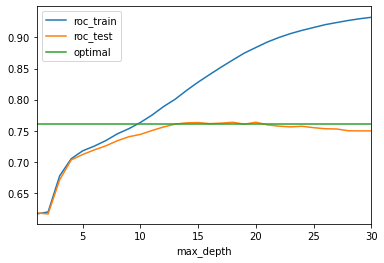

In [43]:
# Identify the optimal tree depth for given data

roc_train=[x[1] for x in accuracy_scores_train]
roc_test=[x[1] for x in accuracy_scores_test]
df_result=pd.DataFrame({'roc_train':roc_train,'roc_test':
                        roc_test,'max_depth':list(max_depth)})
df_result=df_result.set_index('max_depth')
df_result['optimal']=pd.Series(
    index=list(max_depth),data=np.ones(len(
        max_depth))*df_result.roc_test.iloc[15])

df_result.plot()
plt.xlim([1, 30])

In [44]:
df_result.iloc[15]

roc_train    0.840426
roc_test     0.761616
optimal      0.761616
Name: 16, dtype: float64

In [45]:
# ROC CURVE we are able to show the best "max_depth" is around 15
# I decided not to use the DecisionTree results

##### BaggingClassifier, RandomForest

In [120]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bagged_tree = BaggingClassifier(DecisionTreeClassifier(
    criterion='gini', max_depth=15), n_estimators=20)

bagged_tree.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15),
                  n_estimators=20)

In [121]:
bagged_tree.score(X_train,y_train)

0.8384736251402918

In [122]:
bagged_tree.score(X_test,y_test)

0.786060606060606

In [123]:
rfc = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=10)

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [124]:
rfc.score(X_train,y_train)

0.6791245791245791

In [125]:
rfc.score(X_test,y_test)


0.6804713804713804

In [126]:
# BaggingClassifier has a better perfomance comparing to RandonForest 
# I decided not to use RandonForest results 

### Accurancy Score BaggingClassifier

In [127]:
# Accurancy Score on BaggingClassifier

accuracy_scores_train={}
accuracy_scores_test={}
max_depth=range(1,20)
for test_parm in max_depth:
    dt = BaggingClassifier(DecisionTreeClassifier(
        criterion='gini',max_depth=test_parm), n_estimators=20)
    
    dt.fit(X_train, y_train)
    
    accuracy_scores_train[test_parm]=dt.score(X_train,y_train)
    accuracy_scores_test[test_parm]=dt.score(X_test,y_test)

In [128]:
accuracy_scores_train

{1: 0.6162289562289562,
 2: 0.6197530864197531,
 3: 0.6756902356902357,
 4: 0.704668911335578,
 5: 0.7187878787878788,
 6: 0.728327721661055,
 7: 0.7387205387205387,
 8: 0.7489337822671156,
 9: 0.7589225589225589,
 10: 0.7737373737373737,
 11: 0.7861728395061729,
 12: 0.8007407407407408,
 13: 0.8132659932659932,
 14: 0.82668911335578,
 15: 0.8371492704826038,
 16: 0.8506397306397306,
 17: 0.8633670033670033,
 18: 0.8727272727272727,
 19: 0.8818406285072952}

<AxesSubplot:>

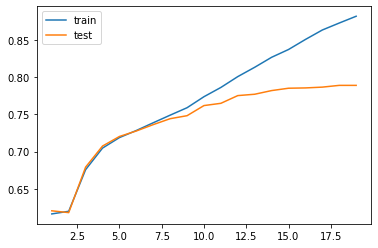

In [129]:
df_test=pd.DataFrame(accuracy_scores_test.values(),
                     index=accuracy_scores_test.keys(),columns=['test'])

df_train=pd.DataFrame(accuracy_scores_train.values(),
                      index=accuracy_scores_train.keys(),columns=['train'])

df_train.join(df_test).plot()

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_test = bagged_tree.predict(X_test)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.69      0.77      5638
           1       0.76      0.92      0.84      8171
           2       0.57      0.22      0.32      1041

    accuracy                           0.79     14850
   macro avg       0.73      0.61      0.64     14850
weighted avg       0.78      0.79      0.77     14850

[[3903 1667   68]
 [ 529 7536  106]
 [ 133  674  234]]


In [131]:
# Overall the Confusion Matrix on BaggingClassifier 
# it does not have a better perfomance than the DecisonTree

##### AdaBoostClassifier, GradientBoostingClassifier

In [132]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)
gbt_clf = GradientBoostingClassifier(random_state=42)
adaboost_clf.fit(X_train,y_train)
gbt_clf.fit(X_train,y_train)


GradientBoostingClassifier(random_state=42)

In [133]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [134]:
accuracy_score(y_test,gbt_clf_test_preds)

0.7504377104377105

In [135]:
accuracy_score(y_test,adaboost_test_preds)

0.7235690235690235

In [136]:
# GradientBoostingClassifier does slightly better than AdaBoostClassifier
# Still they both do not have a great perfomace

##### XGBOOST

In [137]:
from xgboost import XGBClassifier

# Instantiate XGBClassifier
XGB = XGBClassifier()

# Fit XGBClassifier
XGB.fit(X_train, y_train)

# Predict on training and test sets
training_preds = XGB.predict(X_train)
test_preds = XGB.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

training_accuracy,test_accuracy

[20:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.815712682379349, 0.793063973063973)

In [138]:
# XGBOOST has a good perfomance overall 
# The gap between test and train is small
# The best results comparing to any other model 
# I decided to keep it as my model 

##### Parameter Grid

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight

param_grid = {
    'learning_rate': [0.22], #Used [0.10,0.12,0.14,0.16,0.18,0.20,0.22,0.24,0.26,0.28,0.30], 0.22 optimal
    'max_depth': [10], #Used [3,4,5,6,7,8,9,10,11,12] 10 optimal
    'min_child_weight': [1], #Used [1,3,6] 1 optimal
    'subsample': [0.8], #Used [0.5,0.5,0.7,0.8,0.9,1.0] #0.8 optimal
    'n_estimators': [50], #Used [50,100,150,200,250,300,350] 50 optimal
}

sample_weights=compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

grid_clf = GridSearchCV(XGBClassifier(
    sample_weight=sample_weights),param_grid,
                        scoring='accuracy', cv=3, n_jobs=1)
grid_clf.fit(X_train, y_train)

[20:17:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sample_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:17:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:17:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sample_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters ar

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     sample_weight=array([0.61648954, 0.61648954, 0.61648954, ..., 0.86407541, 0.61648954,
       0.61648954]),
                                     scale_pos_weight=None, subsample

In [140]:
best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)


Grid Search found the following optimal parameters: 
learning_rate: 0.22
max_depth: 10
min_child_weight: 1
n_estimators: 50
subsample: 0.8


In [144]:
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

training_accuracy,test_accuracy

(0.8443097643097643, 0.7974410774410774)

In [145]:
print(confusion_matrix(y_test, test_preds))

[[4130 1451   57]
 [ 606 7441  124]
 [ 150  620  271]]


<AxesSubplot:>

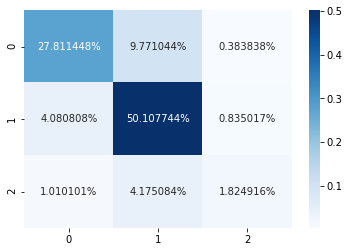

In [146]:
cf_matrix = confusion_matrix(y_test,test_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='2%',cmap='Blues')